In [211]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import random 
import networkx as nx 
import itertools 
import pickle 
from scipy.special import digamma
import seaborn as sns 
import timeit
from Block_PLSA.beta import Block_PLSA,index2ij
from Block_PLSA.utils_beta import draw_image_matrix,get_normalized_theta,get_top_docs,get_top_tokens,get_sub_input,\
get_cluster_results,get_train_graph
import sklearn.metrics as metrics 

In [57]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.15f}".format(x)}) 

In [3]:
# cora dataset
G_cora=nx.read_adjlist('data/Cora_enrich/idx_adjlist.txt',nodetype=int,create_using=nx.DiGraph)
# cora texts
texts_cora=np.loadtxt('data/Cora_enrich/BOW_texts_3876.txt',dtype=np.int)

In [4]:
with open('data/Cora_enrich/tokens_3876.pickle','rb') as f:
    tokens=pickle.load(f)
tokens=np.array(tokens)

labels=[]
with open('data/Cora_enrich/labels.txt') as f:
    for line in f:
        labels.append(line.strip())
labels=np.array(labels)

In [5]:
set(labels)

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

In [326]:
classes=['Neural_Networks','Genetic_Algorithms','Theory','Rule_Learning']

In [327]:
G_sub,labels_sub,texts_sub,_=get_sub_input(classes,G_cora,labels,texts_cora)

In [328]:
bp=Block_PLSA(G_sub,texts_sub)

In [334]:
K=5
initialize='dir'
alpha=0.01
n_iter_EM=50
n_iter_VI=100
gamma_max_gap=0.001
phi_max_gap=0.001
gamma_default=0.01
int_range=(1, 10)
beta=0.1
verbose=10

In [335]:
theta,omega,phi,pi=bp.start(K,initialize,alpha,n_iter_EM,n_iter_VI,gamma_max_gap,phi_max_gap,gamma_default,int_range,beta,verbose)

EM:0,VI:0,gamma_gap:3218.250000
EM:0,VI:10,gamma_gap:0.506913
EM:0,VI:20,gamma_gap:0.001525
EM:0,phi_gap:7.489992,pi_gap:1.107790,omega_gap:6.549351
EM:1,VI:0,gamma_gap:0.000484
EM:1,phi_gap:0.884583,pi_gap:0.020953,omega_gap:0.843849
EM:2,VI:0,gamma_gap:589.101088
EM:2,VI:10,gamma_gap:42.791921
EM:2,VI:20,gamma_gap:22.454442
EM:2,VI:30,gamma_gap:14.835867
EM:2,VI:40,gamma_gap:10.170652
EM:2,VI:50,gamma_gap:7.734283
EM:2,VI:60,gamma_gap:6.193895
EM:2,VI:70,gamma_gap:5.132106
EM:2,VI:80,gamma_gap:3.565940
EM:2,VI:90,gamma_gap:2.698093
EM:2,phi_gap:0.490061,pi_gap:0.011277,omega_gap:0.458434
EM:3,VI:0,gamma_gap:1.913559
EM:3,VI:10,gamma_gap:9.752752
EM:3,VI:20,gamma_gap:6.238970
EM:3,VI:30,gamma_gap:4.533364
EM:3,VI:40,gamma_gap:3.391109
EM:3,VI:50,gamma_gap:2.560830
EM:3,VI:60,gamma_gap:1.282729
EM:3,VI:70,gamma_gap:0.840214
EM:3,VI:80,gamma_gap:0.565704
EM:3,VI:90,gamma_gap:0.388261
EM:3,phi_gap:0.361619,pi_gap:0.008125,omega_gap:0.335286
EM:4,VI:0,gamma_gap:0.270444
EM:4,VI:10,gamma_g

EM:24,phi_gap:0.139283,pi_gap:0.008139,omega_gap:0.153920
EM:25,VI:0,gamma_gap:44.912768
EM:25,VI:10,gamma_gap:5.946747
EM:25,VI:20,gamma_gap:2.184683
EM:25,VI:30,gamma_gap:1.202533
EM:25,VI:40,gamma_gap:0.900131
EM:25,VI:50,gamma_gap:0.853166
EM:25,VI:60,gamma_gap:0.925869
EM:25,VI:70,gamma_gap:0.106602
EM:25,VI:80,gamma_gap:0.013726
EM:25,VI:90,gamma_gap:0.003258
EM:25,phi_gap:0.131731,pi_gap:0.008059,omega_gap:0.145637
EM:26,VI:0,gamma_gap:0.000825
EM:26,phi_gap:0.124069,pi_gap:0.007938,omega_gap:0.137580
EM:27,VI:0,gamma_gap:33.761500
EM:27,VI:10,gamma_gap:3.245395
EM:27,VI:20,gamma_gap:1.611843
EM:27,VI:30,gamma_gap:0.354230
EM:27,VI:40,gamma_gap:0.046523
EM:27,VI:50,gamma_gap:0.007451
EM:27,VI:60,gamma_gap:0.001370
EM:27,phi_gap:0.116987,pi_gap:0.007895,omega_gap:0.130184
EM:28,VI:0,gamma_gap:0.000733
EM:28,phi_gap:0.110891,pi_gap:0.008017,omega_gap:0.122917
EM:29,VI:0,gamma_gap:33.218519
EM:29,VI:10,gamma_gap:2.306363
EM:29,VI:20,gamma_gap:0.295281
EM:29,VI:30,gamma_gap:0.042655

In [336]:
theta 

array([[0.000003, 0.000003, 0.000003, 0.000003, 0.000003],
       [0.000003, 0.097430, 0.000003, 0.000003, 0.000003],
       [0.150482, 0.000003, 0.280942, 0.000003, 0.000003],
       [0.000003, 0.000003, 0.000003, 0.333749, 0.000003],
       [0.000003, 0.018301, 0.000003, 0.000003, 0.119036]])

In [337]:
get_normalized_theta(theta,method='row')

array([[0.200000, 0.200000, 0.200000, 0.200000, 0.200000],
       [0.000032, 0.999872, 0.000032, 0.000032, 0.000032],
       [0.348795, 0.000007, 0.651184, 0.000007, 0.000007],
       [0.000009, 0.000009, 0.000009, 0.999963, 0.000009],
       [0.000023, 0.133250, 0.000023, 0.000023, 0.866683]])

In [338]:
get_top_docs(omega,labels_sub)

[[('Neural_Networks', 0.03260375622967687),
  ('Neural_Networks', 0.012340478142190725),
  ('Neural_Networks', 0.01168114103436441),
  ('Neural_Networks', 0.009537189815747499),
  ('Neural_Networks', 0.008199598623657548),
  ('Neural_Networks', 0.007626907006225341),
  ('Neural_Networks', 0.0069699467765066215),
  ('Neural_Networks', 0.006851448329713696),
  ('Neural_Networks', 0.006845421705998123),
  ('Neural_Networks', 0.006749287351899162)],
 [('Neural_Networks', 0.011766161006209246),
  ('Rule_Learning', 0.011595509033208594),
  ('Theory', 0.010709404809212755),
  ('Neural_Networks', 0.009486102575617042),
  ('Theory', 0.008917909833935176),
  ('Rule_Learning', 0.008847045813799708),
  ('Rule_Learning', 0.008317264180080094),
  ('Theory', 0.007780041877445196),
  ('Theory', 0.007699576826317284),
  ('Neural_Networks', 0.006564629599828042)],
 [('Theory', 0.02537454615016205),
  ('Theory', 0.014100719697744464),
  ('Neural_Networks', 0.011968288536771532),
  ('Theory', 0.0115134755

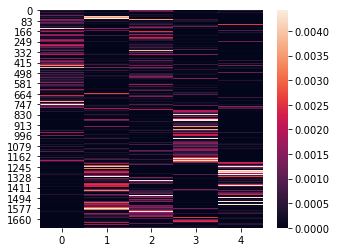

In [339]:
draw_image_matrix(omega,labels_sub,(5,4))

In [325]:
theta 

array([[0.168109, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003],
       [0.000003, 0.097374, 0.000003, 0.000003, 0.000003, 0.000003],
       [0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003],
       [0.000003, 0.000003, 0.000003, 0.104161, 0.000003, 0.000003],
       [0.000003, 0.000003, 0.000003, 0.000003, 0.327491, 0.000003],
       [0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.302756]])

# gibbs sampling to solve theta 

In [89]:
G=G_sub.copy()

In [90]:
# input transformation
SS=[]
RS=[]
ZS=[]
nz=np.zeros(K**2)
i=0
for e in G.edges:
    SS.append(e[0])
    RS.append(e[1])
    z_new=i%K**2
    ZS.append(z_new)
    nz[z_new]+=1
    i+=1
SS=np.array(SS,dtype=np.int)
RS=np.array(RS,dtype=np.int)
ZS=np.array(ZS,dtype=np.int)


# initiate
D=len(G)
L=len(SS)

# helpers
S_ids={}
for idx,s in enumerate(SS):
    if s in S_ids:
        S_ids[s].append(idx)
    else:
        S_ids[s]=[idx]
        
R_ids={}
for idx,r in enumerate(RS):
    if r in R_ids:
        R_ids[r].append(idx)
    else:
        R_ids[r]=[idx]

In [91]:
# runtime parameters
n_iter_gib=100

In [92]:
# gibbs sampling 
for it_gib in range(n_iter_gib):
    for l in range(L):
        z=ZS[l]
        s=SS[l]
        r=RS[l]
        
        nz[z]-=1 
        
        dist=(alpha+nz)*np.repeat(omega[:,s],K)*np.tile(omega[:,r],K)
        dist=dist.astype(np.float64)
        #print(alpha+nz)
        #print(omega[:,s])
        #print(omega[:,r])
        #print(dist)
        dist_norm=dist/dist.sum()
        #print(dist_norm)
        #z_new=np.nonzero(stats.multinomial.rvs(1,dist_norm))[0].item() 
        z_new=np.nonzero(np.random.multinomial(1,dist_norm))[0].item()
        
        ZS[l]=z_new
        nz[z_new]+=1 
    
    print('iter:%d'%(it_gib))

theta_gibbs=(alpha+nz)/(K**2*alpha+nz.sum())
        

iter:0
iter:1
iter:2
iter:3
iter:4
iter:5
iter:6
iter:7
iter:8
iter:9
iter:10
iter:11
iter:12
iter:13
iter:14
iter:15
iter:16
iter:17
iter:18
iter:19
iter:20
iter:21
iter:22
iter:23
iter:24
iter:25
iter:26
iter:27
iter:28
iter:29
iter:30
iter:31
iter:32
iter:33
iter:34
iter:35
iter:36
iter:37
iter:38
iter:39
iter:40
iter:41
iter:42
iter:43
iter:44
iter:45
iter:46
iter:47
iter:48
iter:49
iter:50
iter:51
iter:52
iter:53
iter:54
iter:55
iter:56
iter:57
iter:58
iter:59
iter:60
iter:61
iter:62
iter:63
iter:64
iter:65
iter:66
iter:67
iter:68
iter:69
iter:70
iter:71
iter:72
iter:73
iter:74
iter:75
iter:76
iter:77
iter:78
iter:79
iter:80
iter:81
iter:82
iter:83
iter:84
iter:85
iter:86
iter:87
iter:88
iter:89
iter:90
iter:91
iter:92
iter:93
iter:94
iter:95
iter:96
iter:97
iter:98
iter:99


In [93]:
nz 

array([952.000000000000000, 0.000000000000000, 0.000000000000000,
       0.000000000000000, 1621.000000000000000, 0.000000000000000,
       0.000000000000000, 0.000000000000000, 292.000000000000000])

In [94]:
theta_gibbs

array([0.332279265223780, 0.000003490291753, 0.000003490291753,
       0.000003490291753, 0.565779783532105, 0.000003490291753,
       0.000003490291753, 0.000003490291753, 0.101920009493594])

In [86]:
theta 

array([[0.331087326836267, 0.000003490291753, 0.000003490291753],
       [0.000003490291753, 0.569274132747467, 0.000003490291753],
       [0.000003490291753, 0.000003490291753, 0.099617598665744]])

In [136]:
get_top_docs(omega,labels_sub,top=20)

[[('Genetic_Algorithms', 0.0172769749588337),
  ('Genetic_Algorithms', 0.014073070526238282),
  ('Genetic_Algorithms', 0.014070868778763831),
  ('Genetic_Algorithms', 0.013594590012611157),
  ('Genetic_Algorithms', 0.012525801496188059),
  ('Genetic_Algorithms', 0.011395406530259295),
  ('Genetic_Algorithms', 0.008397081740683423),
  ('Genetic_Algorithms', 0.008182590656802182),
  ('Genetic_Algorithms', 0.007924552863629393),
  ('Genetic_Algorithms', 0.007744011787501097),
  ('Genetic_Algorithms', 0.007436753038079015),
  ('Genetic_Algorithms', 0.006560708627585761),
  ('Genetic_Algorithms', 0.006497125378195877),
  ('Genetic_Algorithms', 0.006445011203045258),
  ('Genetic_Algorithms', 0.00640747096556822),
  ('Genetic_Algorithms', 0.006392802350459848),
  ('Neural_Networks', 0.006217585322207902),
  ('Genetic_Algorithms', 0.006118666896999436),
  ('Genetic_Algorithms', 0.0057114523972802795),
  ('Genetic_Algorithms', 0.005683611747782757)],
 [('Neural_Networks', 0.014427251293139515),

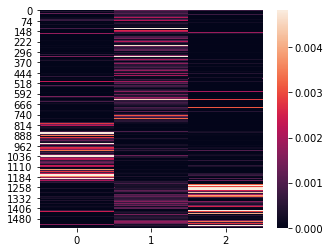

In [98]:
draw_image_matrix(omega,labels_sub,(5,4))

In [130]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

In [99]:
label_id_dict={}
for i,l in enumerate(labels_sub):
    if l in label_id_dict:
        label_id_dict[l].append(i)
    else:
        label_id_dict[l]=[i]

In [257]:
label='Genetic_Algorithms'

In [258]:
result=np.zeros(len(G))
for e in G.edges:
    if e[0] in label_id_dict[label] and not e[1] in label_id_dict[label]:
        result[e[1]]+=1
    elif e[1] in label_id_dict[label] and not e[0] in label_id_dict[label]:
        result[e[0]]+=1 
    

In [259]:
sorted_idx=np.argsort(-result)

In [260]:
result[sorted_idx]

array([7.000000, 3.000000, 3.000000, ..., 0.000000, 0.000000, 0.000000])

In [261]:
len(np.where(result>0)[0]) 

54

In [262]:
sorted_idx

array([ 382,   17, 1007, ...,  518,  529, 1545], dtype=int64)

In [263]:
labels_sub[sorted_idx][:15]

array(['Neural_Networks', 'Theory', 'Neural_Networks', 'Theory',
       'Neural_Networks', 'Neural_Networks', 'Theory', 'Theory',
       'Neural_Networks', 'Neural_Networks', 'Neural_Networks',
       'Neural_Networks', 'Neural_Networks', 'Neural_Networks', 'Theory'],
      dtype='<U22')

In [264]:
result[sorted_idx[10]]

2.0

In [265]:
omega[:,sorted_idx[105]]

array([0.002291, 0.001948, 0.000337])

In [198]:
sorted_idx[10]

897

In [196]:
labels_sub[sorted_idx[10]]

'Theory'

In [195]:
tokens[np.argsort(-texts_sub[sorted_idx[10]])[:30]] 

array(['mackay', 'infer', 'paramet', 'implement', 'bayesian', 'bug',
       'probabilist', 'nois', 'regress', 'varianc', 'new', 'review',
       'distribut', 'network', 'make', 'popul', 'linear', 'fi', 'basi',
       'gaussian', 'hyperparamet', 'ftp', 'free', 'rel', 'depend', 'gibb',
       'techniqu', 'approxim', 'possibl', 'al'], dtype='<U15')

In [183]:
n=0
for i in range(120):
     if omega[1,sorted_idx[i]]>0.0001:
            n+=1

In [184]:
n 

98

In [155]:
len(sorted_idx)

1546

In [180]:
n=0
for i in range(120):
     if omega[:,label_id_dict['Theory'][i]][1]>0.0001:
            n+=1

In [181]:
n 

112

In [248]:
part_a=sorted_idx[:130]
part_b=list(set(label_id_dict['Theory']+label_id_dict['Genetic_Algorithms'])-set(part_a)) 

part_a_value=omega[1,part_a]
part_b_value=omega[1,part_b]

a_b=np.concatenate((part_a_value,part_b_value))[:,np.newaxis] 

In [227]:
len(part_a)

300

In [237]:
np.mean(part_a_value) 

0.0007151235904255456

In [232]:
np.mean(part_b_value)

0.0003852998311252873

In [266]:
np.mean(omega[0,sorted_idx[:50]])

0.0004264476979492316

In [267]:
np.mean(omega[0,label_id_dict['Genetic_Algorithms']]) 

0.0019322976502998334

In [269]:
np.mean(omega[0,label_id_dict['Theory']+label_id_dict['Neural_Networks']]) 

0.00017515161372729364

In [281]:
label='Genetic_Algorithms'
label_idx=0
top=200

In [282]:
temp_set=set(np.argsort(-omega[label_idx,:])[:top])
target_set=set.intersection(temp_set,set(label_id_dict[label]))
link_set=temp_set-target_set

In [287]:
result=np.zeros(len(G))
for e in G.edges:
    if e[0] in target_set and not e[1] in target_set:
        result[e[1]]+=1
    elif e[1] in target_set and not e[0] in target_set:
        result[e[0]]+=1 

In [288]:
len(link_set)

24

In [289]:
result[list(link_set)]

array([0.000000, 0.000000, 0.000000, 2.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000])

In [286]:
len(label_id_dict[label])

415

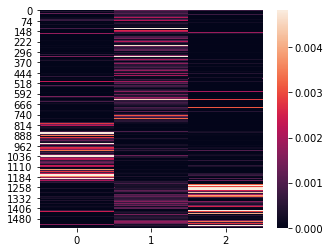

In [290]:
draw_image_matrix(omega,labels_sub,(5,4))

In [293]:
omega[label_idx,list(link_set)]

array([0.001710, 0.002198, 0.001964, 0.002054, 0.002101, 0.002027,
       0.002353, 0.003272, 0.003176, 0.001728, 0.002307, 0.002839,
       0.001771, 0.006218, 0.002104, 0.001862, 0.001792, 0.003293,
       0.002769, 0.001869, 0.002204, 0.002418, 0.001970, 0.002291])

In [291]:
link_set

{17,
 129,
 164,
 247,
 252,
 354,
 430,
 433,
 458,
 523,
 585,
 682,
 695,
 744,
 748,
 761,
 762,
 763,
 857,
 942,
 1021,
 1322,
 1401,
 1544}

In [299]:
result[164]

0.0

In [300]:
tokens[np.argsort(-texts_sub[17])[:30]] 

array(['game', 'strategi', 'consid', 'competit', 'player', 'approxim',
       'oppon', 'domain', 'number', 'random', 'reinforc', 'allow',
       'definit', 'time', 'paper', 'samuel', 'work', 'exist',
       'counterexampl', 'inclus', 'polynomi', 'differenti', 'reli',
       'control', 'design', 'sort', 'main', 'minimax', 'evolv', 'given'],
      dtype='<U15')

In [301]:
labels_sub[17]

'Theory'